In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math
import scipy.fft as fft
from functools import partial
from scipy import signal
%matplotlib inline

In [3]:
#plt.rcParams['figure.figsize'] = [11, 13]
#plt.rcParams['figure.dpi'] = 100

In [4]:
def showPlots(plots):
    colors = ['#06d6a0', '#277da1', '#ee6c4d','#5a189a','#f3722c']
    plotCount = 0
    
    for i in range(len(plots)):
        if 'same' not in plots[i] or plots[i]['same'] == False:
            plotCount+=1
            
    fig, axs = plt.subplots(plotCount)
    pid = 0
    for i in range(len(plots)):
        if 'same' in plots[i] and plots[i]['same'] == True and pid > 0:
            pid -= 1            
        if 'x' not in plots[i]:
            axs[pid].plot(plots[i]['data'], label = plots[i]['label'], color = colors[i%len(colors)])
        else:
            axs[pid].plot(plots[i]['x'][:len(plots[i]['data'])], plots[i]['data'], label = plots[i]['label'], color = colors[i%len(colors)])
        axs[pid].grid()
        axs[pid].legend(loc = 'upper right')
        
        pid+=1

In [9]:
x_step = 0.1 #x-step
t_step = 0.1 #time step
max_x = 1
max_t = 1

w = int(max_x/x_step)
h = int(max_t/t_step)

T1 = 2
T2 = 6
T0 = 2

temperatures = []
for i in range(h):
    new = []
    for j in range(w):
        new.append(0)
    temperatures.append(new)

for i in range(h):
    temperatures[i][0] = T1 + (T2-T1)*(i/(h-1))
temperatures[0][w-1] = T0

In [10]:
temperatures

[[2.0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
 [2.4444444444444446, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2.888888888888889, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3.333333333333333, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [3.7777777777777777, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [4.222222222222222, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [4.666666666666666, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [5.111111111111111, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [5.555555555555555, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [6.0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

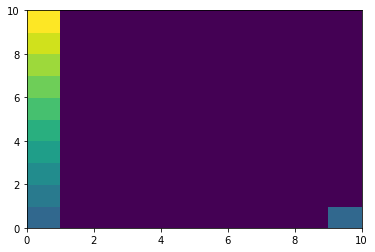

In [11]:
plt.pcolormesh(temperatures)

In [14]:
visited = []
for i in range(h):
    new = []
    for j in range(w):
        new.append(0)
    visited.append(new)
    
def getTemp(x, t):
    if x < 0 or x >= w or t < 0 or t >= h:
        return T0
    if x == 0:
        return temperatures[t][x]
    elif t == 0 and x == w-1:
        return temperatures[t][x]
    return (-(x_step**2)*getTemp(x, t+1)+t_step*getTemp(x+1, t)+t_step*getTemp(x-1, t))/(2*t_step-x_step**2)

In [ ]:
getTemp(1,0)